## 数据清洗

### 加载数据查看数据基本信息

In [1]:
import pandas as pd
#数据读取
app=pd.read_csv('data/applestore.csv')


In [2]:
#数据的基本信息
app.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 11 columns):
Unnamed: 0          7197 non-null int64
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
price               7197 non-null float64
rating_count_tot    7197 non-null int64
user_rating         7197 non-null float64
prime_genre         7197 non-null object
sup_devices         7197 non-null int64
ipadSc_urls         7197 non-null int64
lang                7197 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 618.6+ KB


In [3]:

app.head()


,Unnamed: 0,id,track_name,size_bytes,price,rating_count_tot,user_rating,prime_genre,sup_devices,ipadSc_urls,lang
0,0,281656475,PAC-MAN Premium,100788224,3.99,21292,4.0,Games,38,5,10
1,1,281796108,Evernote - stay organized,158578688,0.00,161065,4.0,Productivity,37,5,23
2,2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,Weather,37,5,3
3,3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,Shopping,37,5,9
4,4,282935706,Bible,92774400,0.00,985920,4.5,Reference,37,5,45


### 处理特殊列


In [4]:
#发现了unname 0这个奇怪的变量，需要进行清理
app.drop('Unnamed: 0',axis=1,inplace=True)


In [5]:
app.describe()


,id,size_bytes,price,rating_count_tot,user_rating,sup_devices,ipadSc_urls,lang
count,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000
mean,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,3.526956,37.361817,3.707100,5.434903
std,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,1.517948,3.737715,1.986005,7.919593
min,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,9.000000,0.000000,0.000000
25%,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,3.500000,37.000000,3.000000,1.000000
50%,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,4.000000,37.000000,5.000000,1.000000
75%,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,4.500000,38.000000,5.000000,8.000000
max,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,5.000000,47.000000,5.000000,75.000000


### 处理size

In [6]:
app['size_mb'] = app['size_bytes'] / (1024 * 1024.0)
app.size_mb.describe()


count    7197.000000
mean      189.909414
std       342.566408
min         0.562500
25%        44.749023
50%        92.652344
75%       173.497070
max      3839.463867
Name: size_mb, dtype: float64

### 新增标签

In [7]:
#根据价格新增标签
app['paid'] = app['price'].apply(lambda x: 1 if x > 0 else 0)


In [8]:
#这里x为price，为paid赋值，即当price＞0，paid为1，其他情况下，paid为0
app.paid.describe()



count    7197.000000
mean        0.436432
std         0.495977
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: paid, dtype: float64

## 单变量分析

### 查看价格分布

In [9]:
#value_counts (price,prime_genre)
#value_counts只能对应series，不能对整个dataframe做操作
#从数据中可以看出，价格>50的比较少，将价格快速分组

app.price.value_counts()


0.00      4056
0.99       728
2.99       683
1.99       621
4.99       394
3.99       277
6.99       166
9.99        81
5.99        52
7.99        33
14.99       21
19.99       13
8.99         9
24.99        8
13.99        6
11.99        6
29.99        6
12.99        5
15.99        4
59.99        3
17.99        3
22.99        2
23.99        2
20.99        2
27.99        2
16.99        2
49.99        2
39.99        2
74.99        1
18.99        1
34.99        1
99.99        1
299.99       1
47.99        1
21.99        1
249.99       1
Name: price, dtype: int64

In [10]:
bins = [0,2,10,300]
labels = ['<2', '<10','<300']
app['price_new']=pd.cut(app.price, bins, right=False, labels=labels)
#分组后查看数据分布情况
app.groupby(['price_new'])['price'].describe()


,count,mean,std,min,25%,50%,75%,max
price_new,,,,,,,,
<2,5405.0,0.361981,0.675318,0.00,0.00,0.00,0.00,1.99
<10,1695.0,4.565811,1.864034,2.99,2.99,3.99,4.99,9.99
<300,97.0,28.124021,38.886220,11.99,14.99,19.99,24.99,299.99


### 查看不同类别app的价格分布

In [11]:
# groupby操作
app.groupby(['prime_genre'])['price'].describe()


,count,mean,std,min,25%,50%,75%,max
prime_genre,,,,,,,,
Book,112.0,1.790536,3.342210,0.0,0.0,0.00,2.99,27.99
Business,57.0,5.116316,10.247031,0.0,0.0,2.99,4.99,59.99
Catalogs,10.0,0.799000,2.526660,0.0,0.0,0.00,0.00,7.99
Education,453.0,4.028234,18.725946,0.0,0.0,2.99,2.99,299.99
Entertainment,535.0,0.889701,1.454022,0.0,0.0,0.00,1.99,9.99
Finance,104.0,0.421154,1.108990,0.0,0.0,0.00,0.00,5.99
Food & Drink,63.0,1.552381,3.972119,0.0,0.0,0.00,1.49,27.99
Games,3862.0,1.432923,2.486609,0.0,0.0,0.00,1.99,29.99
Health & Fitness,180.0,1.916444,2.052378,0.0,0.0,1.99,2.99,9.99


In [12]:
# 删除价格大于等于49.99的app
app=app[app['price']<=49.99]


In [13]:
# 评论情况分析
app.rating_count_tot.describe()


count    7.190000e+03
mean     1.290515e+04
std      7.577526e+04
min      0.000000e+00
25%      2.725000e+01
50%      3.005000e+02
75%      2.796750e+03
max      2.974676e+06
Name: rating_count_tot, dtype: float64

### 对用户打分进行分组

In [14]:

bins = [0,1000,5000,100000,5000000]
app['rating_new']=pd.cut(app.rating_count_tot, bins, right=False)
#用户打分和价格的关系
app.groupby(['rating_new'])['price'].describe()


,count,mean,std,min,25%,50%,75%,max
rating_new,,,,,,,,
"[0, 1000)",4587.0,1.798696,3.324682,0.0,0.0,0.0,2.99,49.99
"[1000, 5000)",1193.0,1.740721,3.203853,0.0,0.0,0.0,2.99,39.99
"[5000, 100000)",1192.0,0.963549,1.984895,0.0,0.0,0.0,0.99,14.99
"[100000, 5000000)",218.0,0.196376,0.925160,0.0,0.0,0.0,0.00,7.99


## 业务数据可视化

### app类型和评分关系

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<Figure size 2160x1440 with 0 Axes>

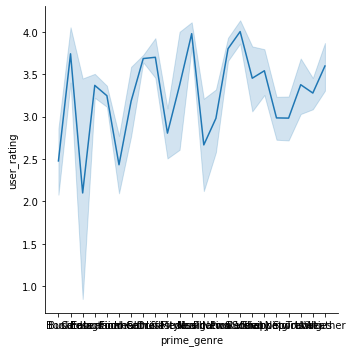

In [16]:
#app评分关系
plt.figure(figsize=(30,20))#调整大小
sns.relplot(x="prime_genre", y="user_rating",kind='line',
              data=app) #折线图


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 <a list of 23 Text xticklabel objects>)

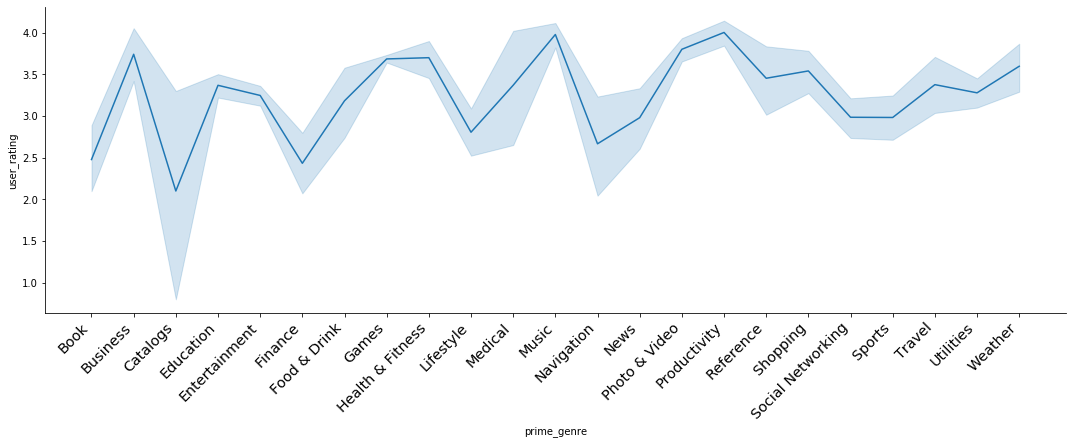

In [17]:
sns.relplot(x="prime_genre", y="user_rating",kind='line',data=app,height=5,aspect=3) 
#将x轴文字旋转45度
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

### 价格分布

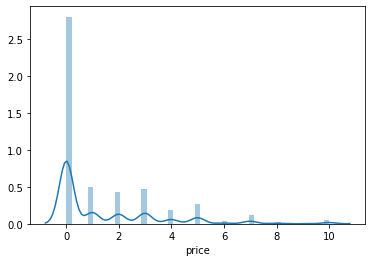

In [18]:
app1=app[app['price']<=9.99]
#直方图，APP价格的分布
sns.distplot(app1['price'])
# 从上面的结果中看出，大部分应用都是免费的，极少数APP的收费>5元
# 收费app的价格分布是如何的？不同类别之间有关系吗？


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text yticklabel objects>)

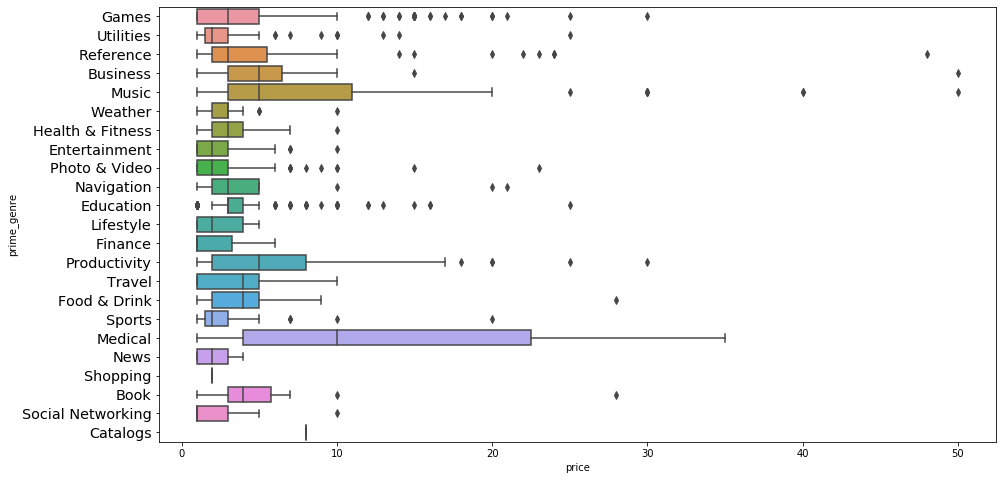

In [19]:
plt.figure(figsize=(15,8))#调整大小
sns.boxplot(x='price',y='prime_genre',data=app[app['paid']==1])
plt.yticks(fontweight='light',fontsize='x-large')
# 价格绝大部分都集中在9.99美元以内，个别类别（如医疗）等因专业性总体价格会高于其他类别


### 绘制前五个类别的app价格

/Users/vincent/anaconda3/envs/itcast/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


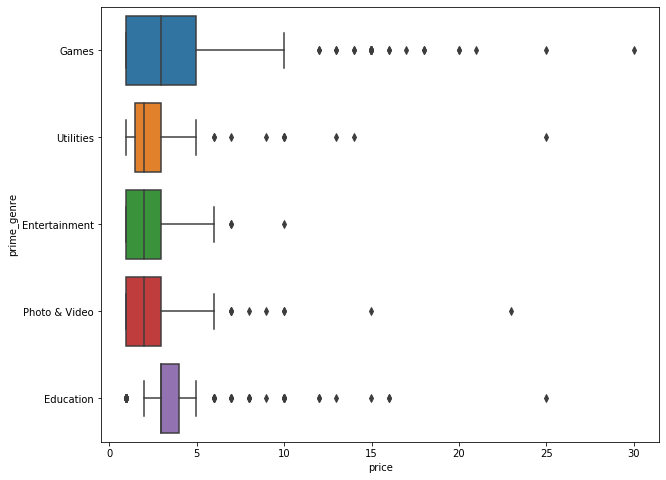

In [20]:
#只保留应用数量最多的前5个类别
top5 = app.groupby(['prime_genre'])['price'].count().sort_values(ascending = False).head().index.tolist()
app5 = app[app.prime_genre.isin(top5)]
plt.figure(figsize=(10,8))#调整大小
sns.boxplot(x='price',y='prime_genre',data=app5[app['paid']==1]) #箱线图
#从上图可以看出，Games的价格分布更广，最大值也较高，异常值也较多


### 价格和用户评分的分布

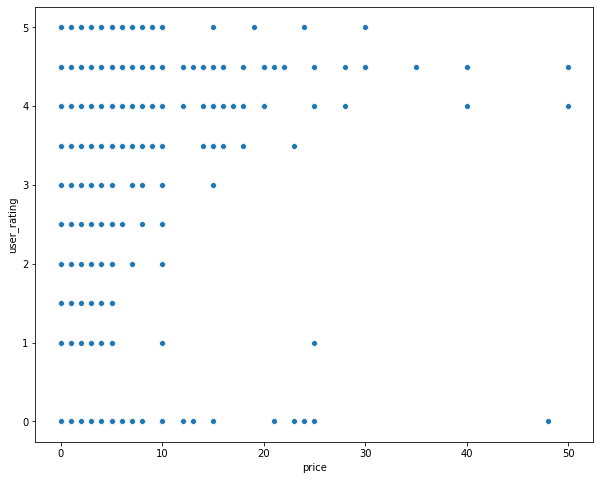

In [22]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='price',y='user_rating',data=app) #散点图
#从散点图可以看出，价格和评价关联不强，高价的应用评价两级分化，但数据相对较少



### 前5个类别app的用户评分均值



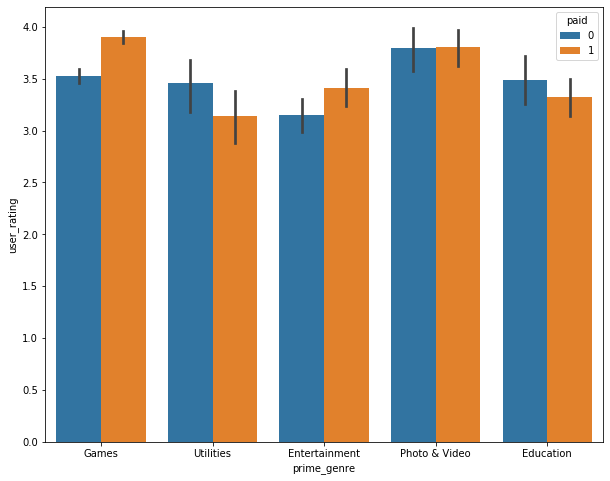

In [24]:
#同一类别，将免费和付费的评分进行对比
plt.figure(figsize=(10,8))
sns.barplot(x='prime_genre',y='user_rating',hue='paid',data=app5) #柱状图



## 业务解读

### 免费或收费APP集中在哪些类别

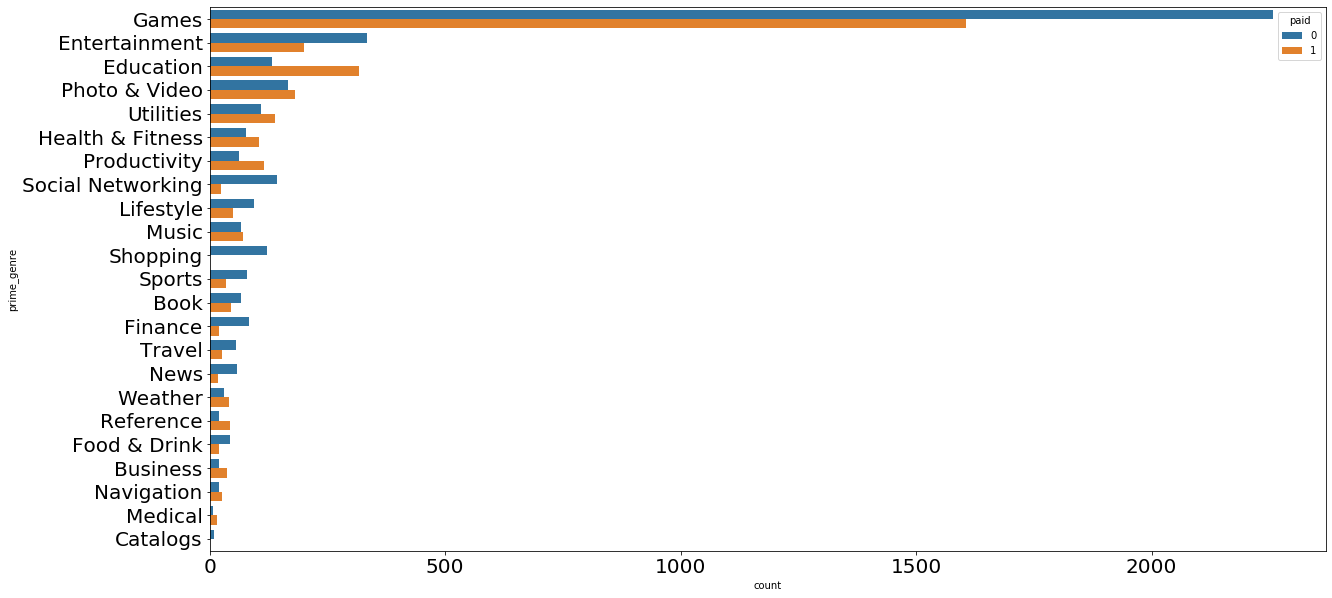

In [25]:
#使用countplot--count是对数据加总，plot将数据进行可视化
#参数order 指定数据显示的顺序
plt.figure(figsize=(20,10))
sns.countplot(y='prime_genre',hue='paid',data=app,order=app['prime_genre'].value_counts().index)
plt.tick_params(labelsize=20)


### 免费与收费的APP在不同评分区间的分布

In [26]:
# 将评分进行分箱，查看落入不同箱中应用的数量
bins=[0,0.5,2.5,4.5,5.1]
app['rating_level']=pd.cut(app.user_rating,bins,right=False)
app.groupby(['rating_level'])['user_rating'].describe()
  

,count,mean,std,min,25%,50%,75%,max
rating_level,,,,,,,,
"[0.0, 0.5)",929.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
"[0.5, 2.5)",206.0,1.650485,0.400213,1.0,1.5,2.0,2.0,2.0
"[2.5, 4.5)",2903.0,3.646056,0.467987,2.5,3.5,4.0,4.0,4.0
"[4.5, 5.1)",3152.0,4.578046,0.181500,4.5,4.5,4.5,4.5,5.0


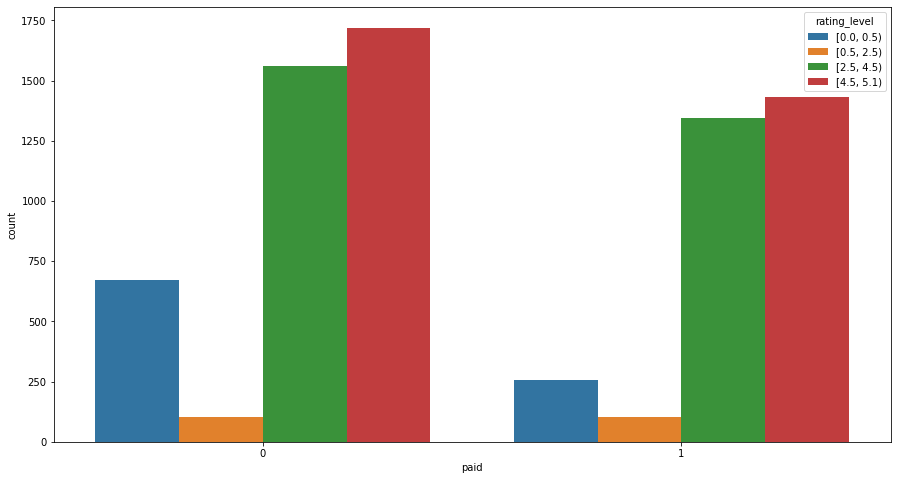

In [28]:
plt.figure(figsize=(15,8))
sns.countplot(x='paid',hue='rating_level',data=app)
# 免费和收费APP，评分的分布基本相似，收费的APP低分的相对少一些


### APP的大小和用户评分之间关系

In [29]:
# 通过热力图来查看变量之间两两相关系数
q4=['user_rating','price','size_mb']
app[q4].corr()


,user_rating,price,size_mb
user_rating,1.000000,0.073237,0.066160
price,0.073237,1.000000,0.314386
size_mb,0.066160,0.314386,1.000000


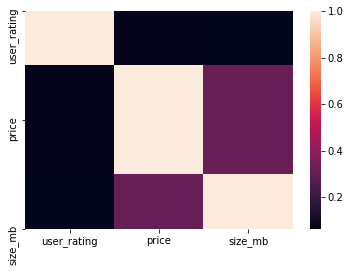

In [30]:
sns.heatmap(app[q4].corr())
#热力图，展现变量之间两两之间关系的强弱

